In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import read_quote      as rq
import stock_functions as sf
import df_visualizations as dv
import remap_values as rv

import sys
import time

In [2]:
%matplotlib inline
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (14, 10)

colorz = [ 'white', 'red', 'blue', 'green', 'orange', 'cyan', 'olivedrab', 'darkred', 'steeleblue', 'seagreen' ]

In [3]:
inpFile = 'quotes/sbux.csv'
ibm_quote = rq.readQuote( inpFile )

In [4]:
roll_nums = [3,5,10,15,20,25,30]
mom_nums  = [3,5,10,20,30]
rsi_nums  = [10,15,20,25,30]
band_nums = [3,5,10,15,20]

In [5]:
diffs = sf.generate_differentials   ( ibm_quote            )
rolls = sf.generate_rolling_close   ( ibm_quote, roll_nums )
moms  = sf.generate_momentum_close  ( ibm_quote, mom_nums  )
rsi   = sf.generate_rsi             ( ibm_quote, rsi_nums  )
bands = sf.generate_bollinger_bands ( ibm_quote, band_nums )

In [6]:
foo = ibm_quote[['close','open']].copy()
for i in roll_nums:
    foo['close_mean_'+str(i)] = rolls['close_mean_'+str(i)]
foo = foo.drop( 'open', axis=1 )
foo.head()

,close,close_mean_3,close_mean_5,close_mean_10,close_mean_15,close_mean_20,close_mean_25,close_mean_30
date,,,,,,,,
2017/07/14,58.76,58.560000,58.278,58.153,58.498667,58.8925,59.3044,60.045000
2017/07/13,58.38,58.273333,58.134,58.113,58.548667,58.9590,59.4436,60.211333
2017/07/12,58.54,58.083333,57.978,58.193,58.654000,59.0535,59.6484,60.385667
2017/07/11,57.90,57.916667,57.858,58.235,58.742000,59.1725,59.8732,60.543000
2017/07/10,57.81,57.816667,57.928,58.409,58.942000,59.3420,60.1280,60.723000


In [7]:
bar          = foo.copy()
bar['close'] = ( foo.shift(1) / foo - 1 )
for i in [3,5,10]:
    bar['close_mean_'+str(i)] = ( foo['close_mean_'+str(i)].shift(i) / foo['close_mean_'+str(i)] - 1 )    
bar = bar[['close','close_mean_3','close_mean_5','close_mean_10']]
bar = bar.replace([np.inf, -np.inf], np.nan).fillna(0)
bar.head()

,close,close_mean_3,close_mean_5,close_mean_10
date,,,,
2017/07/14,0.000000,0.000000,0.0,0.0
2017/07/13,0.006509,0.000000,0.0,0.0
2017/07/12,-0.002733,0.000000,0.0,0.0
2017/07/11,0.011054,0.011108,0.0,0.0
2017/07/10,0.001557,0.007899,0.0,0.0


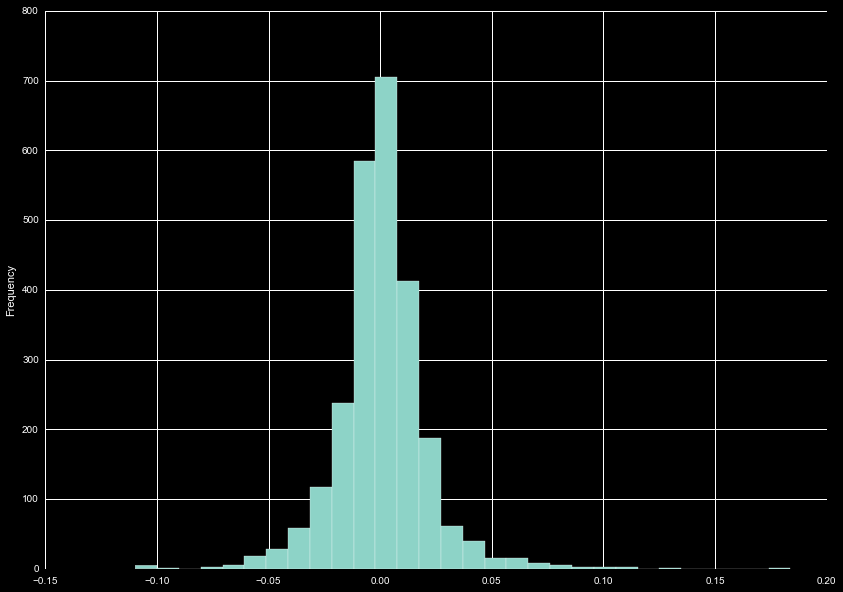

In [8]:
bar['close'].plot.hist( bins=30 )

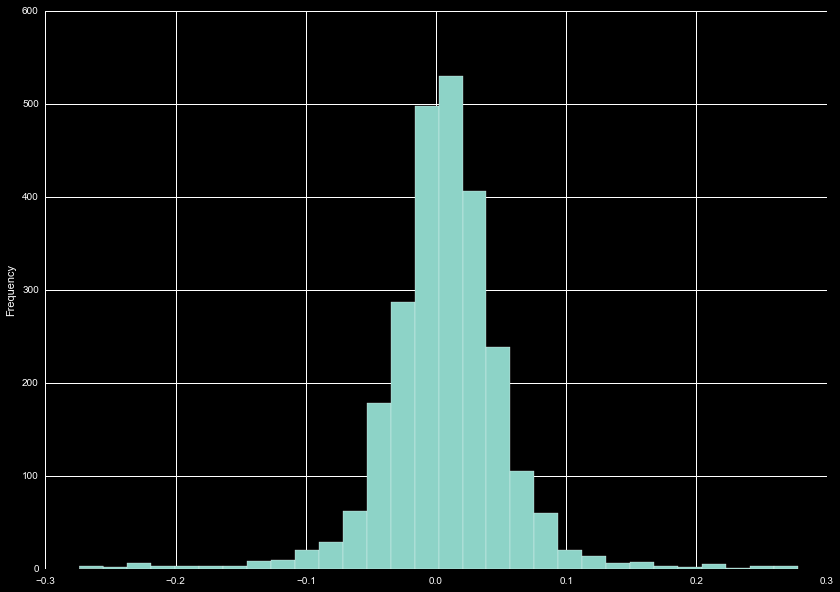

In [9]:
bar['close_mean_10'].plot.hist( bins=30 )

In [9]:
bar['close_mean_10'].describe()

count    2519.000000
mean        0.010764
std         0.053286
min        -0.257174
25%        -0.018898
50%         0.012317
75%         0.045105
max         0.155060
Name: close_mean_10, dtype: float64

/home/sean/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


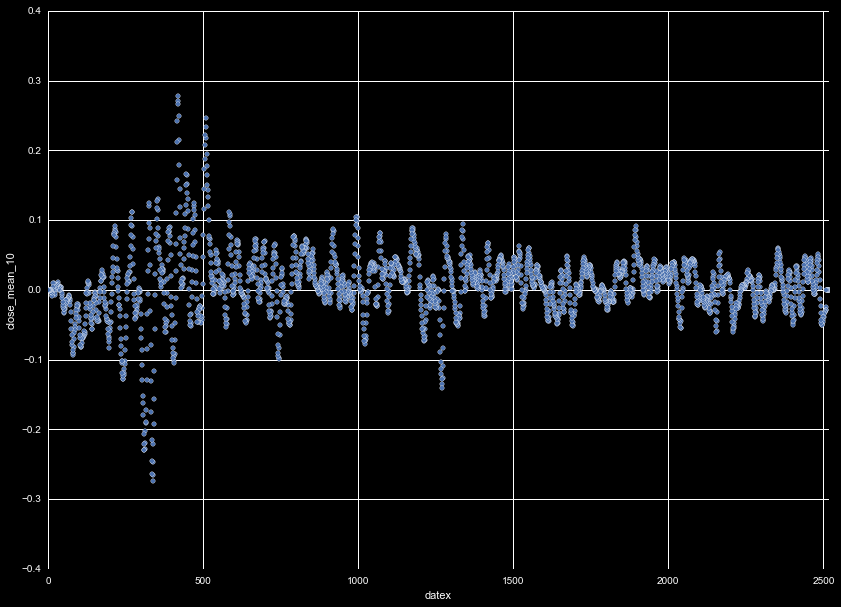

In [10]:
foobar = bar.copy()
foobar['datex'] = np.arange( bar.shape[0], 0, -1 )
foobar.plot.scatter( x='datex', 
                     y='close_mean_10', 
                     xlim=[0,bar.shape[0]] )

In [11]:
foobar = bar.join( diffs, how='inner' )

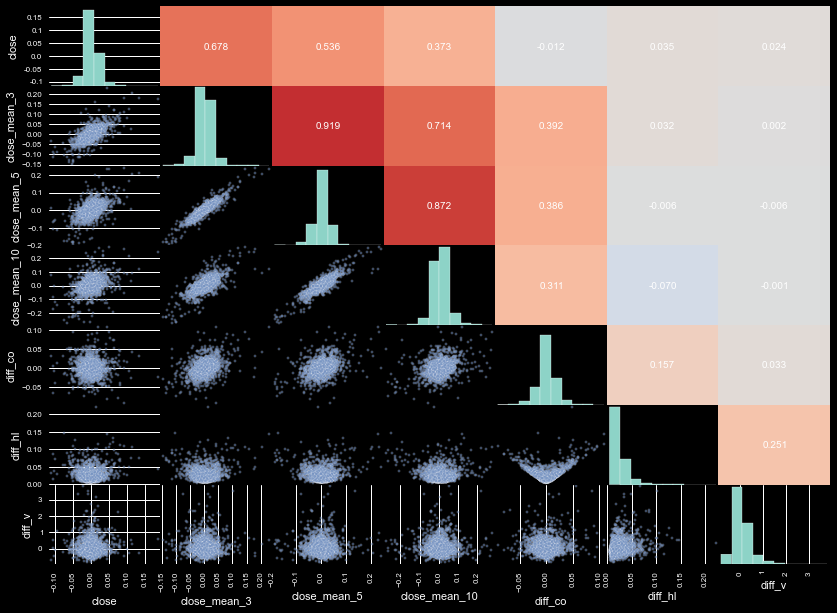

In [12]:
dv.corr_plot( foobar, corr_method = 'pearson')

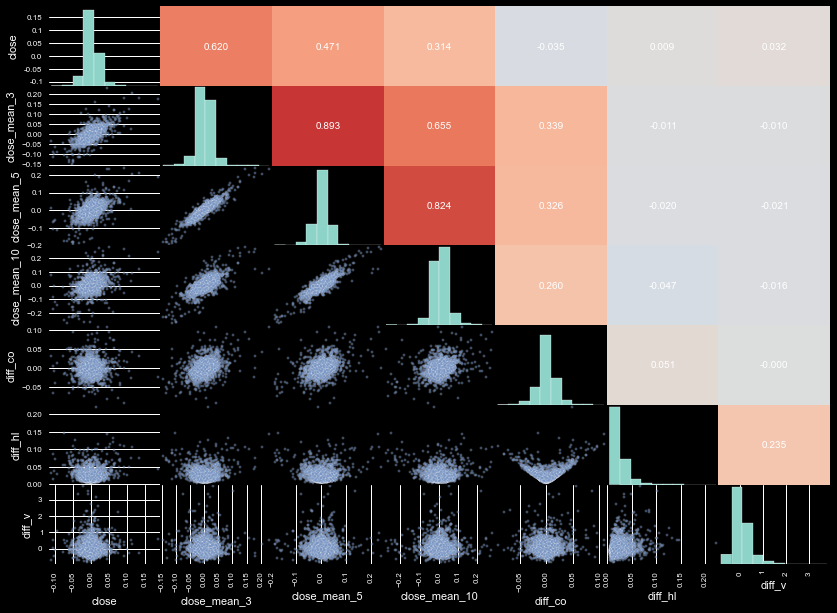

In [13]:
dv.corr_plot( foobar )

In [14]:
print diffs.corrwith( bar['close']         )
print diffs.corrwith( bar['close_mean_3']  )
print diffs.corrwith( bar['close_mean_5']  )
print diffs.corrwith( bar['close_mean_10'] )

diff_co   -0.011846
diff_hl    0.034704
diff_v     0.024340
dtype: float64
diff_co    0.392219
diff_hl    0.032039
diff_v     0.002220
dtype: float64
diff_co    0.385504
diff_hl   -0.006186
diff_v    -0.006362
dtype: float64
diff_co    0.311367
diff_hl   -0.070440
diff_v    -0.000779
dtype: float64


In [91]:
# Diffs appear to be useful

In [15]:
foobar = bar.join( moms, how='inner' )

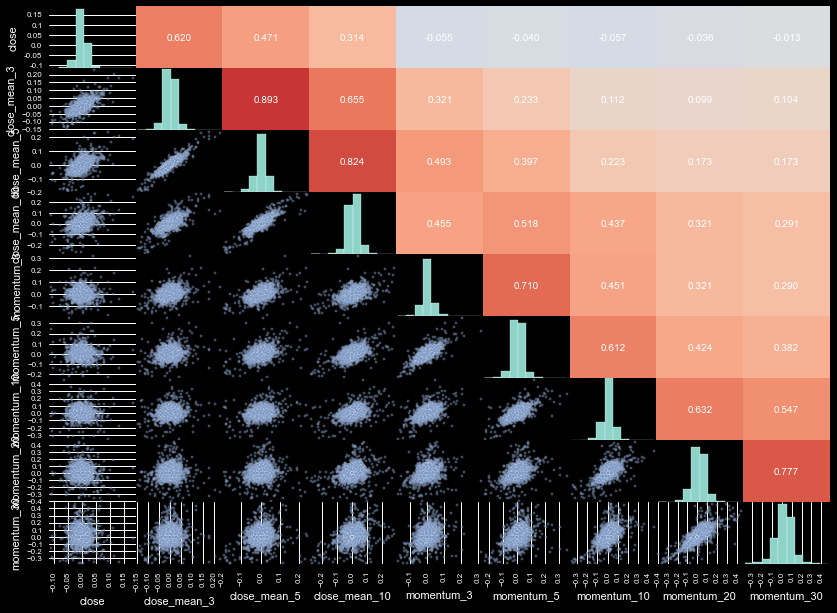

In [16]:
dv.corr_plot( foobar )

In [17]:
print moms.corrwith( bar['close']         )
print moms.corrwith( bar['close_mean_3']  )
print moms.corrwith( bar['close_mean_5']  )
print moms.corrwith( bar['close_mean_10'] )

momentum_3    -0.019017
momentum_5    -0.037596
momentum_10   -0.028718
momentum_20   -0.054633
momentum_30   -0.011161
dtype: float64
momentum_3     0.375797
momentum_5     0.265463
momentum_10    0.162993
momentum_20    0.067597
momentum_30    0.117009
dtype: float64
momentum_3     0.541138
momentum_5     0.437770
momentum_10    0.276525
momentum_20    0.138633
momentum_30    0.195894
dtype: float64
momentum_3     0.512152
momentum_5     0.566283
momentum_10    0.474966
momentum_20    0.287078
momentum_30    0.328558
dtype: float64


In [115]:
# Momentum 3 5 and 10 do decent job

In [18]:
foobar = bar.join( rsi, how='inner' )

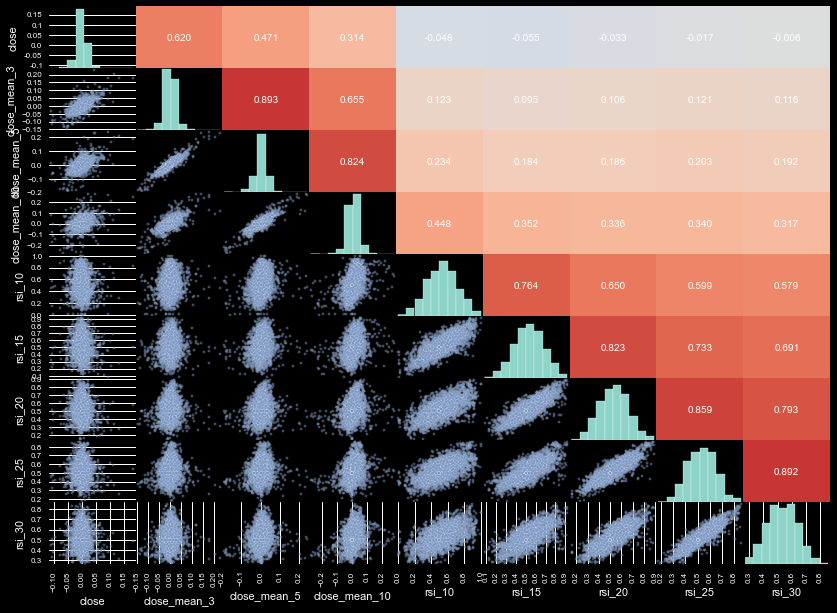

In [19]:
dv.corr_plot( foobar )

In [20]:
print rsi.corrwith( bar['close']         )
print rsi.corrwith( bar['close_mean_3']  )
print rsi.corrwith( bar['close_mean_5']  )
print rsi.corrwith( bar['close_mean_10'] )

rsi_10   -0.029971
rsi_15   -0.049211
rsi_20   -0.035228
rsi_25   -0.023425
rsi_30   -0.013412
dtype: float64
rsi_10    0.135690
rsi_15    0.080403
rsi_20    0.082997
rsi_25    0.093318
rsi_30    0.098174
dtype: float64
rsi_10    0.236076
rsi_15    0.161818
rsi_20    0.152874
rsi_25    0.163485
rsi_30    0.168587
dtype: float64
rsi_10    0.411052
rsi_15    0.308736
rsi_20    0.281899
rsi_25    0.284774
rsi_30    0.285757
dtype: float64


In [119]:
# RSI 10, 15 good

In [21]:
foobar = bar.join( bands, how='inner' )

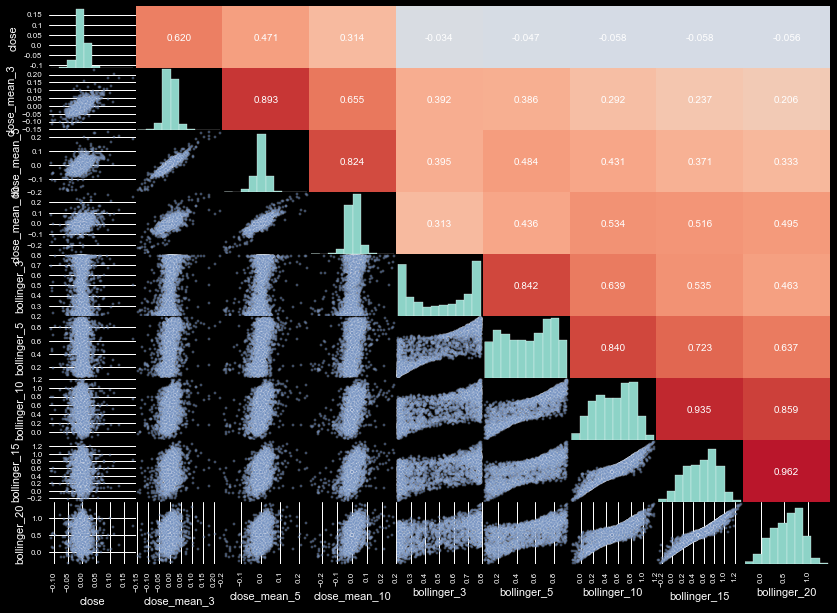

In [22]:
dv.corr_plot( foobar )

In [23]:
print bands.corrwith( bar['close']         )
print bands.corrwith( bar['close_mean_3']  )
print bands.corrwith( bar['close_mean_5']  )
print bands.corrwith( bar['close_mean_10'] )

bollinger_3    -0.027228
bollinger_5    -0.040298
bollinger_10   -0.042589
bollinger_15   -0.039790
bollinger_20   -0.039295
dtype: float64
bollinger_3     0.359521
bollinger_5     0.348777
bollinger_10    0.278265
bollinger_15    0.239138
bollinger_20    0.212542
dtype: float64
bollinger_3     0.368028
bollinger_5     0.433299
bollinger_10    0.397317
bollinger_15    0.354484
bollinger_20    0.326915
dtype: float64
bollinger_3     0.300498
bollinger_5     0.395868
bollinger_10    0.478675
bollinger_15    0.466345
bollinger_20    0.455777
dtype: float64


In [128]:
# bollinger_3, 5, 10, 15 - all good for predictive means around that number of days